<a href="https://colab.research.google.com/github/cjsutton77/MiscStuff/blob/master/numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import imageio as io
import numpy as np
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image

# training_data = datasets.FashionMNIST(  
#     root="data",
#     train=True,
#     download=True#,
#     #transform=ToTensor()
# )


In [10]:
kitty1 = io.imread('https://static01.nyt.com/images/2021/09/14/science/07CAT-STRIPES/07CAT-STRIPES-jumbo.jpg?quality=75&auto=webp')

In [11]:
kitty2 = io.imread('https://media.istockphoto.com/photos/kitten-exploring-domestic-setting-picture-id1335433001?s=612x612')

In [12]:
kitty3 = io.imread('https://images.unsplash.com/photo-1615789591457-74a63395c990?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8YmFieSUyMGNhdHxlbnwwfHwwfHw%3D&w=1000&q=80')

In [198]:
kitty = [kitty1,kitty2,kitty3]
for i in range(1,4):
  print(kitty[i-1].shape)
  kitty[i-1] = kitty[i-1].mean(axis=2)
  kitty[i-1] = kitty[i-1][:400,:400]
  kitty[i-1] = np.pad(kitty[i-1],pad_width=100)
  np.save(f'kitty{i}.npy',kitty[i - 1])
!pwd
!ls -alrt

(683, 1024, 3)
(408, 612, 3)
(1500, 1000, 3)
/content
total 8472
drwxr-xr-x 1 root root    4096 Apr  8 13:31 .config
drwxr-xr-x 1 root root    4096 Apr  8 13:32 sample_data
drwxr-xr-x 1 root root    4096 Apr 16 00:53 ..
drwxr-xr-x 2 root root    4096 Apr 16 00:57 caltech101
drwxr-xr-x 3 root root    4096 Apr 16 00:59 data
drwxr-xr-x 1 root root    4096 Apr 16 01:12 .
-rw-r--r-- 1 root root 2880128 Apr 16 02:17 kitty1.npy
-rw-r--r-- 1 root root 2880128 Apr 16 02:17 kitty2.npy
-rw-r--r-- 1 root root 2880128 Apr 16 02:17 kitty3.npy


In [199]:
import glob
import pandas as pd

list_of_files = glob.glob('*.npy')
df = pd.DataFrame(data=list_of_files,columns=['filename'])
df['label'] = True

df

,filename,label
0,kitty1.npy,True
1,kitty2.npy,True
2,kitty3.npy,True


In [200]:
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self,
                 data_frame,
                 source_column='filename', 
                 label_column='label'):
        self.img_source = data_frame[source_column]
        self.img_labels = data_frame[label_column]

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        timage = torch.from_numpy(np.load(self.img_source.iloc[idx]))
        label = self.img_labels.iloc[idx]
        return timage, label

In [201]:
dset1 = CustomImageDataset(df,source_column='filename')

In [202]:
dl1 = DataLoader(dset1,batch_size=3)

In [203]:
train_features, train_labels = next(iter(dl1))

<class 'torch.Tensor'> torch.Size([600, 600])


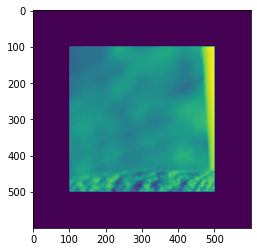

<class 'torch.Tensor'> torch.Size([600, 600])


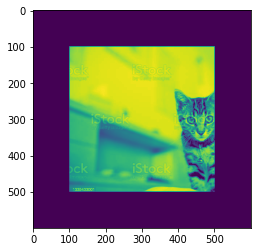

<class 'torch.Tensor'> torch.Size([600, 600])


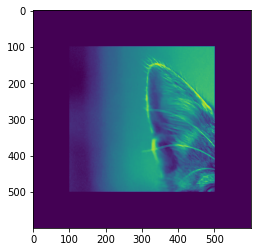

In [204]:
for i in train_features:
  print(type(i),i.size())
  plt.imshow(i)
  plt.show()